# Airbnb Sydney

`imports`

In [44]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

In [45]:
%matplotlib inline

In [46]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [47]:
if os.path.isfile("listings.csv"):
    filepath = "listings.csv"
    print("loading from file")
else:
    filepath = "http://data.insideairbnb.com/australia/nsw/sydney/2021-04-10/visualisations/listings.csv"
    print("retrieve from the inside airbnb")

df = pd.read_csv("listings.csv")
print("done")

loading from file
done


In [48]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11156,An Oasis in the City,40855,Colleen,NaN,Sydney,-33.86767,151.22497,Private room,65.00,2,196,13/03/2020,1.42,1,364
1,12351,Sydney City & Harbour at the door,17061,Stuart,NaN,Sydney,-33.86490,151.19171,Private room,143.15,2,526,22/09/2019,4.03,2,0
2,14250,Manly Harbour House,55948,Heidi,NaN,Manly,-33.80084,151.26378,Entire home/apt,470.00,5,2,2/01/2019,0.03,2,122
3,15253,Unique Designer Rooftop Apartment in City Loca...,59850,Morag,NaN,Sydney,-33.87964,151.21680,Private room,80.00,2,367,7/03/2021,3.30,1,336
4,44545,Sunny Darlinghurst Warehouse Apartment,112237,Atari,NaN,Sydney,-33.87888,151.21439,Entire home/apt,130.00,3,76,3/01/2020,0.60,1,0


In [49]:
#rows, columns
df.shape

(32679, 16)

In [50]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [51]:
hostnames = df.host_name
hostnames

0                            Colleen
1                             Stuart
2                              Heidi
3                              Morag
4                              Atari
                    ...             
32674                         Galina
32675    Cushie - Concierge Services
32676                         Victor
32677                         Victor
32678                           Sean
Name: host_name, Length: 32679, dtype: object

In [52]:
#overall number of names
def overallnames(hostnames):
    count = 0 
    for element in hostnames:
        count +=1
    return count
print("number of overall names: ", overallnames(hostnames))

number of overall names:  32679


In [53]:
#overall number of names without dups
hostnames_wdups = len(set(hostnames))
print("number of host names without duplicates:", hostnames_wdups)

number of host names without duplicates: 7500


In [54]:
#all names no dups
listof_hostnames = hostnames.drop_duplicates().tolist()
listof_hostnames

['Colleen',
 'Stuart',
 'Heidi',
 'Morag',
 'Atari',
 'John',
 'Eilish',
 'Nicolette',
 'Belinda',
 'Liz',
 'Bryan',
 'Pamela',
 'Ben',
 'Romina',
 'Maz',
 'Helen',
 'Jude',
 'Karen',
 'James',
 'Ann',
 'Marianne',
 'Nicole',
 'Christopher',
 'Susanne',
 'Mel',
 'Family Team -',
 'Tobias',
 'Diana & Lorenzo',
 'Marty',
 'Susie',
 'Sarah',
 'Ingrid',
 'Christian',
 'Greg',
 'Donny',
 'Kirsteen',
 'Margaret',
 'Judy',
 'MadeComfy',
 'Stefanie',
 'Jenni',
 'Sally',
 'Tommy',
 'Laelie',
 'Kristin',
 'Sophie & Todd',
 'Bronwyn',
 'Liora',
 'Sebastien',
 'Jacqui',
 'Lynda',
 'Hugh',
 'Joe',
 'Adrian',
 'Jess',
 'Malou',
 'Coleen',
 'Bondi Beach Holiday Homes',
 'Edwina',
 'Carrie',
 'Lucy',
 'Deborah',
 'Kathy',
 'Gretchen',
 'Ruth',
 nan,
 'Michelle',
 'Scott',
 'Martha',
 'Mina',
 'Jen',
 'Ann And Mad',
 'Jelle',
 'Vic And  Lori',
 'Paul',
 'Micky',
 'Michael',
 'Thais',
 'Janice',
 'Claire',
 'Mark',
 'Cathy',
 'Tabitha',
 'David',
 'Deyaco',
 'Leigh & Phillip',
 'Anna',
 'Jo',
 'Craig',


In [55]:
#clean id+names of hosts list to determine the most popular names
hostnames_id = df[['host_id','host_name']]
nodups_hostnamesid = hostnames_id.drop_duplicates()
nodups_hostnamesid.head()   

,host_id,host_name
0,40855,Colleen
1,17061,Stuart
2,55948,Heidi
3,59850,Morag
4,112237,Atari


In [56]:
number_host = len(nodups_hostnamesid.host_name)
number_host

24406

In [57]:
#filter the most popular names 
n = 10
topname_count = nodups_hostnamesid.host_name.value_counts()[:n]
topname_count

David      209
James      163
Sarah      156
Michael    151
Chris      133
Paul       128
Andrew     125
Daniel     113
Anna       111
Laura      108
Name: host_name, dtype: int64

<AxesSubplot:>

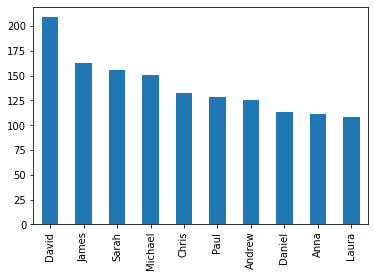

In [58]:
topname_count.plot(kind = 'bar')

In [59]:
neighbourhoods = df['neighbourhood']
neighbourhoods

0              Sydney
1              Sydney
2               Manly
3              Sydney
4              Sydney
             ...     
32674    Marrickville
32675       Pittwater
32676            Ryde
32677      Canada Bay
32678      Canada Bay
Name: neighbourhood, Length: 32679, dtype: object

In [60]:
#number of neighbourhoods
nO_loctions = len(set(neighbourhoods))
print("number of neighbourhoods: ", nO_loctions)

number of neighbourhoods:  38


In [61]:
#the list of neighbourhoods no dups
listof_neighbourhoods = neighbourhoods.drop_duplicates().tolist()
listof_neighbourhoods

['Sydney',
 'Manly',
 'Mosman',
 'Waverley',
 'Woollahra',
 'Marrickville',
 'Hornsby',
 'Warringah',
 'Rockdale',
 'Randwick',
 'North Sydney',
 'Ku-Ring-Gai',
 'Leichhardt',
 'Pittwater',
 'Sutherland Shire',
 'Blacktown',
 'Willoughby',
 'The Hills Shire',
 'Ashfield',
 'City Of Kogarah',
 'Lane Cove',
 'Parramatta',
 'Hurstville',
 'Canterbury',
 'Botany Bay',
 'Canada Bay',
 'Penrith',
 'Hunters Hill',
 'Ryde',
 'Holroyd',
 'Auburn',
 'Burwood',
 'Camden',
 'Liverpool',
 'Strathfield',
 'Bankstown',
 'Campbelltown',
 'Fairfield']

In [62]:
#most_popular_neighbourhoods = ""
n = 10
most_popular_neighbourhoods = neighbourhoods.value_counts()[:n]
most_popular_neighbourhoods

Sydney          7773
Waverley        4622
Randwick        2989
Warringah       1674
Manly           1599
Woollahra       1312
North Sydney    1184
Pittwater       1144
Marrickville    1098
Rockdale         834
Name: neighbourhood, dtype: int64

<AxesSubplot:>

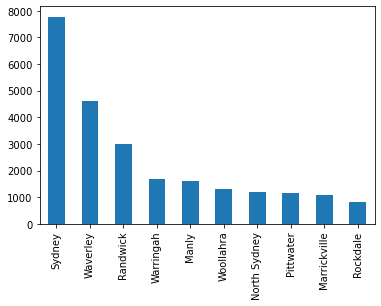

In [63]:
most_popular_neighbourhoods.plot(kind='bar')

In [64]:
#condensed listing
condensed = (df[['host_name', 'neighbourhood', 'room_type', 'price']])
condensed

,host_name,neighbourhood,room_type,price
0,Colleen,Sydney,Private room,65.00
1,Stuart,Sydney,Private room,143.15
2,Heidi,Manly,Entire home/apt,470.00
3,Morag,Sydney,Private room,80.00
4,Atari,Sydney,Entire home/apt,130.00
...,...,...,...,...
32674,Galina,Marrickville,Entire home/apt,88.00
32675,Cushie - Concierge Services,Pittwater,Entire home/apt,400.00
32676,Victor,Ryde,Entire home/apt,128.00
32677,Victor,Canada Bay,Entire home/apt,110.00


In [65]:
#type of airbnb spaces
spaces = df['room_type']
typeof_spaces = dict.fromkeys(spaces).keys()
typeof_spaces

dict_keys(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'])

In [66]:
#how many of said type
number_of_spacetypes = spaces.value_counts()
number_of_spacetypes

Entire home/apt    19716
Private room       12150
Shared room          580
Hotel room           233
Name: room_type, dtype: int64

<AxesSubplot:ylabel='room_type'>

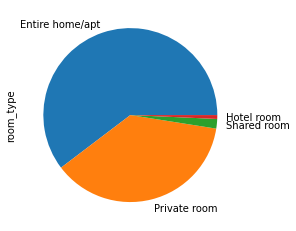

In [67]:
number_of_spacetypes.plot(kind= 'pie')

In [68]:
#Total Prices of Room Types
total_prices_by_room = {'Entire home/apt':0, 'Private room':0, 'Shared room':0, 'Hotel room':0}
for counter,roomType in enumerate(df['room_type']):
    total_prices_by_room[roomType] = total_prices_by_room[roomType] + df['price'][counter]
print (total_prices_by_room)

{'Entire home/apt': 5839693.0, 'Private room': 1319810.3, 'Shared room': 38567.0, 'Hotel room': 50396.0}


In [69]:
average_price_by_room = {     
    'Entire home/apt': total_prices_by_room['Entire home/apt']/number_of_spacetypes['Entire home/apt'],     
    'Private room ': total_prices_by_room['Private room']/number_of_spacetypes['Private room'],     
    'Shared room ': total_prices_by_room['Shared room']/number_of_spacetypes['Shared room'],     
    'Hotel room': total_prices_by_room['Hotel room']/number_of_spacetypes['Hotel room']}
average_price_by_room

{'Entire home/apt': 296.19055589369043,
 'Private room ': 108.6263621399177,
 'Shared room ': 66.4948275862069,
 'Hotel room': 216.29184549356222}

<BarContainer object of 4 artists>

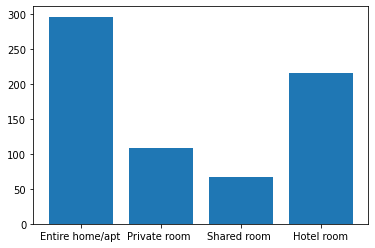

In [70]:
keys = average_price_by_room.keys()
values = average_price_by_room.values()
plt.bar(keys, values)

In [71]:
#average price of locations
averageprice_locations = condensed.groupby(['neighbourhood']).mean().sort_values('price', ascending=False)
averageprice_locations

,price
neighbourhood,
Pittwater,636.568182
Mosman,438.368764
Woollahra,362.272866
Hunters Hill,339.240741
Manly,326.312695
Holroyd,302.222222
Warringah,290.795102
Waverley,243.135223
Sutherland Shire,231.376726


In [72]:
#dictionary of neighbourhoods
dictionary_of_neighbourhoods = dict.fromkeys(neighbourhoods)
dictionary_of_neighbourhoods


{'Sydney': None,
 'Manly': None,
 'Mosman': None,
 'Waverley': None,
 'Woollahra': None,
 'Marrickville': None,
 'Hornsby': None,
 'Warringah': None,
 'Rockdale': None,
 'Randwick': None,
 'North Sydney': None,
 'Ku-Ring-Gai': None,
 'Leichhardt': None,
 'Pittwater': None,
 'Sutherland Shire': None,
 'Blacktown': None,
 'Willoughby': None,
 'The Hills Shire': None,
 'Ashfield': None,
 'City Of Kogarah': None,
 'Lane Cove': None,
 'Parramatta': None,
 'Hurstville': None,
 'Canterbury': None,
 'Botany Bay': None,
 'Canada Bay': None,
 'Penrith': None,
 'Hunters Hill': None,
 'Ryde': None,
 'Holroyd': None,
 'Auburn': None,
 'Burwood': None,
 'Camden': None,
 'Liverpool': None,
 'Strathfield': None,
 'Bankstown': None,
 'Campbelltown': None,
 'Fairfield': None}

In [88]:
total_prices_by_room_location = {'Entire home/apt':0, 'Private room':0, 'Shared room':0, 'Hotel room':0}
for counter,roomType in enumerate(df['room_type']):
    total_prices_by_room[roomType] = total_prices_by_room[roomType] + df['price'][counter]


KeyError: 'neighbourhood'

In [ ]:
#average price of locations +
condensed.groupby(['neighbourhood', 'room_type']).mean().sort_values('price', ascending=False)

,,price
neighbourhood,room_type,
Pittwater,Entire home/apt,676.415879
Woollahra,Hotel room,635.833333
Mosman,Entire home/apt,511.669421
The Hills Shire,Entire home/apt,469.594595
Woollahra,Entire home/apt,449.922481
...,...,...
Holroyd,Shared room,42.500000
Woollahra,Shared room,39.100000
Camden,Shared room,35.000000


In [ ]:
#reviews
x = 10
df["last_review"].value_counts()[:x]

5/04/2021     435
2/01/2020     303
1/01/2020     301
4/04/2021     273
11/04/2021    266
6/04/2021     216
3/01/2020     207
10/04/2021    197
28/03/2021    187
1/01/2019     180
Name: last_review, dtype: int64

<AxesSubplot:>

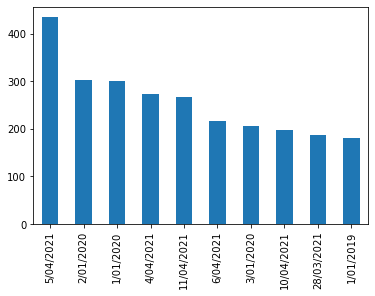

In [ ]:
df["last_review"].value_counts()[:x].plot(kind="bar")

In [ ]:
row_one = df.iloc[0]
row_one

id                                               11156
name                              An Oasis in the City
host_id                                          40855
host_name                                      Colleen
neighbourhood_group                                NaN
neighbourhood                                   Sydney
latitude                                     -33.86767
longitude                                    151.22497
room_type                                 Private room
price                                             65.0
minimum_nights                                       2
number_of_reviews                                  196
last_review                                 13/03/2020
reviews_per_month                                 1.42
calculated_host_listings_count                       1
availability_365                                   364
Name: 0, dtype: object